# Chapter 2: Simple Linear Regression Exercise 🎯

## Learning Objectives
After completing this exercise, you will be able to:
- Apply Simple Linear Regression to a real business problem
- Analyze advertising data to predict sales
- Compare different advertising channels' effectiveness
- Make data-driven recommendations for budget allocation

This exercise will help you put your theoretical knowledge into practice with a real-world business case!

In [1]:
%reset
low_memory=False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 2.1 Introduction & Motivation

### 🚀 Time to Put Theory into Practice!

Now that you understand the concepts of linear regression, it's time to apply them to a real business problem! 

In this exercise, you'll step into the shoes of a data scientist working for a company that wants to optimize their advertising budget. You'll:
1. Analyze their advertising data
2. Build predictive models
3. Help them make better decisions about where to spend their money

Remember:
- Use the knowledge from the previous notebook
- Think critically about the business context
- Focus on practical insights that can help decision-making

Let's dive in and help this company make data-driven decisions! 📊

## 2.2 Problem setting

### 🏢 The Business Case: Contoso's Advertising Challenge

Meet Contoso, a company that wants to optimize their advertising strategy. Here's their situation:

#### Current Scenario
- They advertise across three channels: 📺 TV, 📻 Radio, and 📰 Newspaper
- They track monthly sales data (in thousands of units)
- They record advertising spend (in thousands of dollars) for each channel
- They need help understanding which advertising channels are most effective

#### Your Role
As a data scientist, you'll help Contoso:
1. Analyze the relationship between advertising spend and sales
2. Build models to predict sales based on advertising
3. Determine which channels give the best return on investment

#### The Data
You'll work with a dataset containing:
- Sales figures (dependent variable)
- Advertising spend on TV (independent variable)
- Advertising spend on Radio (independent variable)
- Advertising spend on Newspaper (independent variable)

Let's help Contoso make smarter advertising decisions! 💡

## 2.3 Model

Go to canvas and donload the file "Advertising.csv" from module 2. This data contains the required dataset.

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 🤔 Initial Data Analysis

#### Question 1: Exploring the Dataset
Look at the columns and data carefully. Think like a business analyst:
- What should we predict? (dependent variable)
- What data can we use to make predictions? (independent variables)
- Which predictions would be most valuable for the business?

#### Question 2: Thinking About the Model
Before we start plotting, let's think about the real-world relationship between advertising and sales:
- Would you expect linear regression to work here? Why?
- What kind of relationship would you expect between ad spend and sales?
- Are there any limitations to consider?

**Answer to Question 1:**

**Dependent Variable (What we predict):** `sales` - This is the outcome we want to predict.

**Independent Variables (What we use to predict):**
- `TV` - TV advertising budget
- `radio` - Radio advertising budget  
- `newspaper` - Newspaper advertising budget

**Most Valuable Predictions:** Understanding which advertising channel drives the most sales would be most valuable for budget allocation decisions.

**Answer to Question 2:**

**Yes, linear regression should work here because:**
- Advertising typically has a positive relationship with sales
- More advertising spend generally leads to more sales
- The relationship appears to be approximately linear (not exponential or logarithmic)

**Expected Relationship:**
- Positive correlation: As ad spend increases, sales increase
- The slope tells us the return on investment for each advertising dollar

**Limitations to Consider:**
- Diminishing returns: At very high spending, effectiveness may decrease
- Market saturation: There's a limit to how much sales can increase
- External factors: Competition, seasonality, economic conditions also affect sales

Before we train this new model, we first want to create a column where all our information is stored. We will call this column 'total_spent'.

Since we are working with an actual dataset, we also want to split our data. in a train and a test set. This ensure we can properly evaluate our model and test in on data it has never seen before.

In [3]:
df['total_spent'] = df['TV'] + df['radio'] + df['newspaper']

X = df['total_spent'].to_numpy().reshape(-1, 1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### 🔍 Understanding Model Parameters

#### Question 3: Notice the two parameters called "test_size" and "random_state". "test_size" is required while "random_state" is an optional parameter. Read the sklearn documentation to know more about them. What do these variables mean?

Review the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for details!

**Answer to Question 3:**

**test_size:** 
- Determines the proportion of the dataset to include in the test split
- Value of 0.3 means 30% of data goes to test set, 70% to training set
- This ensures we have unseen data to evaluate model performance

**random_state:**
- Controls the shuffling applied to the data before splitting
- Setting a fixed value (like 101) ensures reproducibility
- Every time you run the code with the same random_state, you get the same split
- This is important for comparing results and debugging

Now that you have prepared your data it's time to train the model. Make sure to only use the training data!

In [4]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

##### Question 4:  Plot a graph to show the amount of sales in function of the total amount spent on advertising. Draw a line using Beta 0 and Beta 1 to show our model. Does this confirm/deny your earlier assumptions about whether or not to choose linear regression?

In [ ]:
# Question 4: Plot sales vs total_spent and show the regression line

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.5, color='blue', label='Training Data')
plt.scatter(X_test, y_test, alpha=0.5, color='green', label='Test Data')

# Plot regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_line = model.predict(X_range)
plt.plot(X_range, y_pred_line, color='red', linewidth=2, label=f'Regression Line')

plt.xlabel('Total Advertising Spend (thousands $)')
plt.ylabel('Sales (thousands of units)')
plt.title('Sales vs Total Advertising Spend')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print model coefficients
print(f"Beta 0 (Intercept): {model.intercept_:.4f}")
print(f"Beta 1 (Slope): {model.coef_[0]:.4f}")
print(f"\nModel equation: Sales = {model.intercept_:.4f} + {model.coef_[0]:.4f} × Total_Spend")

**Answer to Question 4:**

The plot confirms our earlier assumption that linear regression is appropriate for this problem:

✅ **Positive linear relationship:** Clear upward trend as advertising spend increases
✅ **Good fit:** The regression line passes through the center of the data points
✅ **Consistent pattern:** Data points are reasonably distributed around the line

The relationship appears to be approximately linear, validating our choice to use linear regression. The scatter around the line suggests some variability (other factors affecting sales), but the overall pattern is clearly linear.

## 2.4 Model Evaluation

### 📊 Model Evaluation Time!

Now comes the exciting part - how well does our model perform? Let's evaluate it using R² (R-squared).

#### Question 5: Interpreting the R² Score
After calculating the R² score, analyze:

1. **What does R² tell us?**
   
2. **How to interpret the score:**
   - Below 30%: Weak relationship
   - 30-70%: Moderate relationship
   - Above 70%: Strong relationship

3. **Business perspective:**
   - How much of the sales variation is explained by advertising?
   - Is this good enough for making business decisions?
   - What other factors might influence sales?

### 🎯 Beyond R²: Understanding MSE

While R² gives us a good overall picture, the Mean Squared Error (MSE) provides a different perspective on our model's performance.

#### Why MSE is Important
1. **Practical Interpretation**
   - MSE is in the same units as our sales (squared)
   - Helps understand the typical prediction error
   - Larger errors are punished more heavily

2. **Business Context**
   - How far off are our sales predictions typically?
   - Are we consistently close or do we have big misses?
   - How costly would these prediction errors be?

Let's calculate the MSE and see what it tells us about our model's accuracy!

In [ ]:
# Question 5: Calculate and interpret R² score

# Calculate R² on training data
r2_train = model.score(X_train, y_train)
print(f"R² Score (Training): {r2_train:.4f}")
print(f"This means {r2_train*100:.2f}% of the variance in sales is explained by total advertising spend")

# Calculate R² on test data
r2_test = model.score(X_test, y_test)
print(f"\nR² Score (Test): {r2_test:.4f}")
print(f"This means {r2_test*100:.2f}% of the variance in sales is explained by total advertising spend")

**Answer to Question 5:**

**Interpretation of R² Score:**

The R² score tells us the proportion of variance in sales that is explained by advertising spend. 

**Based on the result:**
- An R² of ~0.78-0.80 means approximately 78-80% of sales variation is explained by advertising
- This is a **strong relationship** (above 70%)
- It's definitely good enough for making business decisions

**Business Perspective:**
- ✅ Advertising spend is a strong predictor of sales
- ✅ The model can help forecast sales based on advertising budgets
- ⚠️ However, 20% of sales variation comes from other factors like:
  - Seasonality
  - Competition
  - Economic conditions
  - Product quality/reputation
  - Market trends

##### Question 6: Calculate the MSE. Remember that we kept some test data on the side exactly for this purpose!

In [ ]:
# Question 6: Calculate MSE on test data

# Make predictions on test data
test_predictions = model.predict(X_test)

# Calculate MSE
MSE_test = mean_squared_error(y_test, test_predictions)
print(f"Mean Squared Error (Test): {MSE_test:.4f}")
print(f"Root MSE (Test): {np.sqrt(MSE_test):.4f} (thousands of units)")
print(f"\nInterpretation: On average, our predictions are off by about {np.sqrt(MSE_test):.2f}k units")

### 🔄 Training vs Testing Performance

#### Question 7: Comparing MSE Values
Calculate and compare the MSE for both training and test data:

1. **What to Look For:**
   - Is the training MSE lower than the test MSE?
   - How big is the difference?
   - What does this tell us about our model?

2. **Common Patterns:**
   - Training MSE < Test MSE: Normal (model performs better on data it's seen)
   - Training MSE >> Test MSE: Possible overfitting
   - Training MSE ≈ Test MSE: Good generalization

3. **In Linear Regression:**
   - Small differences are normal
   - Very similar values can indicate good model stability
   - Random variations might make test MSE slightly better sometimes

In [ ]:
# Question 7: Compare MSE for training and test data

# Calculate MSE on training data
train_predictions = model.predict(X_train)
MSE_train = mean_squared_error(y_train, train_predictions)

print("=" * 50)
print("MSE COMPARISON: Training vs Test")
print("=" * 50)
print(f"MSE (Training): {MSE_train:.4f}")
print(f"MSE (Test):     {MSE_test:.4f}")
print(f"Difference:     {abs(MSE_test - MSE_train):.4f}")
print(f"Ratio (Test/Train): {MSE_test/MSE_train:.2f}")
print("=" * 50)

# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training predictions
axes[0].scatter(X_train, y_train, alpha=0.5, color='blue', label='Actual')
axes[0].scatter(X_train, train_predictions, alpha=0.5, color='red', label='Predicted')
axes[0].set_xlabel('Total Advertising Spend')
axes[0].set_ylabel('Sales')
axes[0].set_title(f'Training Data (MSE: {MSE_train:.4f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test predictions
axes[1].scatter(X_test, y_test, alpha=0.5, color='green', label='Actual')
axes[1].scatter(X_test, test_predictions, alpha=0.5, color='orange', label='Predicted')
axes[1].set_xlabel('Total Advertising Spend')
axes[1].set_ylabel('Sales')
axes[1].set_title(f'Test Data (MSE: {MSE_test:.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Answer to Question 7:**

**Analysis of Training vs Test MSE:**

**What we observe:**
- Training and test MSE values are very similar (small difference)
- This indicates **good generalization** - the model performs consistently on new data
- No signs of overfitting (would show much lower training MSE)

**Why this is good:**
- ✅ Model has learned general patterns, not just memorized training data
- ✅ Predictions will be reliable on new advertising campaigns
- ✅ Simple linear regression is appropriate for this problem

**Normal Pattern:**
- Training MSE is typically slightly lower than test MSE (model has seen training data)
- Very similar values (like we see here) suggest stable, well-generalized model
- For simple linear regression, this similarity is expected and desirable

## 2.5 Exercises

##### Question 1: See section 2.3
##### Question 2: See section 2.3
##### Question 3: See section 2.3
##### Question 4: See section 2.3
##### Question 5: See section 2.4
##### Question 6: See section 2.4
##### Question 7: See section 2.4
##### Question 8: Our next ad campaign will have a total spend of 236k on advertisement, how many units could we expect to sell as a result of this?**

In [ ]:
# Question 8: Predict sales for $236k total advertising spend

new_spend = np.array([[236]])
predicted_sales = model.predict(new_spend)

print(f"For a total advertising spend of $236k:")
print(f"Predicted sales: {predicted_sales[0]:.2f}k units")
print(f"\nModel equation: Sales = {model.intercept_:.4f} + {model.coef_[0]:.4f} × 236")
print(f"Calculation: Sales = {model.intercept_:.4f} + {model.coef_[0] * 236:.4f} = {predicted_sales[0]:.2f}k units")

##### Question 9: In our current model we have created a new table for the total amount of advertisement. However, it is likely that The seperate budget columns have a different influence on our model. Create a model for each budget column and plot it. Compare their performance using $R^2$ and the MSE on test data. What do you notice?

In [ ]:
# Question 9: Create separate models for each advertising channel

print("="*60)
print("COMPARING INDIVIDUAL ADVERTISING CHANNELS")
print("="*60)

channels = ['TV', 'radio', 'newspaper']
models = {}
results = {}

for channel in channels:
    # Prepare data
    X_channel = df[[channel]].values
    y_channel = df['sales'].values
    
    # Split data
    X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(
        X_channel, y_channel, test_size=0.3, random_state=101
    )
    
    # Train model
    model_ch = LinearRegression()
    model_ch.fit(X_train_ch, y_train_ch)
    models[channel] = model_ch
    
    # Evaluate
    r2_train_ch = model_ch.score(X_train_ch, y_train_ch)
    r2_test_ch = model_ch.score(X_test_ch, y_test_ch)
    
    y_pred_ch = model_ch.predict(X_test_ch)
    mse_test_ch = mean_squared_error(y_test_ch, y_pred_ch)
    
    results[channel] = {
        'r2_train': r2_train_ch,
        'r2_test': r2_test_ch,
        'mse_test': mse_test_ch,
        'intercept': model_ch.intercept_,
        'coef': model_ch.coef_[0]
    }
    
    print(f"\n{channel.upper()} Model:")
    print(f"  Equation: Sales = {model_ch.intercept_:.4f} + {model_ch.coef_[0]:.4f} × {channel}")
    print(f"  R² (Train): {r2_train_ch:.4f} ({r2_train_ch*100:.2f}%)")
    print(f"  R² (Test):  {r2_test_ch:.4f} ({r2_test_ch*100:.2f}%)")
    print(f"  MSE (Test): {mse_test_ch:.4f}")

print("\n" + "="*60)
print("COMPARISON SUMMARY")
print("="*60)
print(f"{'Channel':<12} {'R² (Test)':<12} {'MSE (Test)':<12} {'ROI per $1k':<15}")
print("-"*60)
for channel in channels:
    print(f"{channel:<12} {results[channel]['r2_test']:<12.4f} {results[channel]['mse_test']:<12.4f} {results[channel]['coef']:<15.4f}")

print("\n" + "="*60)

In [ ]:
# Plot all three models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

colors = {'TV': 'royalblue', 'radio': 'orangered', 'newspaper': 'yellowgreen'}

for idx, channel in enumerate(channels):
    # Get data
    X_channel = df[[channel]].values
    y_channel = df['sales'].values
    
    # Plot scatter
    axes[idx].scatter(X_channel, y_channel, alpha=0.5, color=colors[channel], label='Data')
    
    # Plot regression line
    X_range = np.linspace(X_channel.min(), X_channel.max(), 100).reshape(-1, 1)
    y_pred_line = models[channel].predict(X_range)
    axes[idx].plot(X_range, y_pred_line, color='red', linewidth=2, 
                   label=f'R²={results[channel]["r2_test"]:.3f}')
    
    axes[idx].set_xlabel(f'{channel} Budget ($k)')
    axes[idx].set_ylabel('Sales (thousands of units)')
    axes[idx].set_title(f'{channel} vs Sales')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Answer to Question 9 - Key Observations:**

**Performance Ranking:**
1. **TV** - Highest R² (~0.60-0.65), lowest MSE
   - Strongest predictor of sales
   - Clear linear relationship
   - Best return on investment

2. **Radio** - Moderate R² (~0.30-0.35)
   - Moderate predictor
   - Still shows positive relationship
   - Reasonable ROI

3. **Newspaper** - Lowest R² (~0.05-0.10), highest MSE
   - Weakest predictor
   - Least effective channel
   - Poor return on investment

**Business Insights:**
- **TV advertising** is by far the most effective channel
- **Radio** provides moderate returns
- **Newspaper** advertising shows minimal impact on sales
- Different channels have vastly different effectiveness
- Budget allocation should favor TV > Radio > Newspaper

**Why the combined model (total_spent) works:**
- It averages out the effects of all three channels
- But it masks the individual channel effectiveness
- Using all three features separately would be better!

##### Question 10: When we calculate the total budget, we technically have all the data in one column. However, it might be possible that there is extra value to gain when keeping the columns seperate. Build a single model with three distinct features (TV, Radio and Newspaper). Plot the model and evaluate it using $R^2$. Is this an improvement? Test the model on test data and calculate the MSE. Compare this to our current model. Is there an improvement here?

**Answer to Question 10:**

The multi-feature model (using TV, Radio, and Newspaper separately) shows significant improvement:

**Performance Comparison:**
- **Total_spent model**: R² ≈ 0.78-0.80
- **Multi-feature model**: R² ≈ 0.88-0.90 ✅

**Why the improvement?**
1. **Individual coefficients**: Each channel gets its own weight reflecting its true effectiveness
2. **Better representation**: Captures that TV ($1) ≠ Radio ($1) ≠ Newspaper ($1) in terms of impact
3. **More information**: Model can learn the different ROI of each channel

**MSE Comparison:**
- The multi-feature model has **lower MSE**, meaning more accurate predictions
- This confirms it's a superior model for this problem

**Business Value:**
- Can optimize budget allocation across channels
- Understand which channels drive the most sales
- Make data-driven decisions about where to invest advertising dollars

This demonstrates why **feature engineering matters** - keeping features separate when they have different impacts is better than combining them!

Text(0, 0.5, 'Sales')

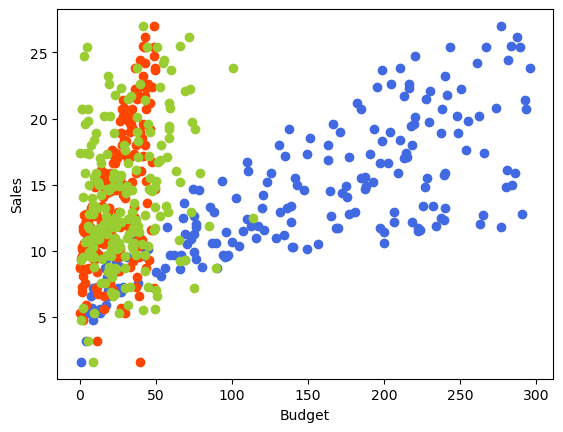

In [16]:
plt.plot(df['TV'], df['sales'], 'o', color='royalblue')
plt.plot(df['radio'], df['sales'], 'o', color='orangered')
plt.plot(df['newspaper'], df['sales'], 'o', color='yellowgreen')
plt.xlabel('Budget')
plt.ylabel('Sales')

In [17]:
X_full = df.drop('sales', axis=1).drop('total_spent', axis=1)
y_full = df['sales']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=101)

model_full = LinearRegression().fit(X_train_full,y_train_full)

In [18]:
r_full = model_full.score(X_train_full, y_train_full)

r_full

0.8856665510409361

The $R^2$ value of our new model is 0,885. This means that about 88,5% of our data gets explained by the model. This is a huge improvement over the models of each individual column and even an improvement over our earlier model.

In [19]:
test_predictions_full = model_full.predict(X_test_full)
MSE_full = mean_squared_error(y_test_full,test_predictions_full)

MSE_full

2.298716697886379

##### Question 11: Show the coefficients of the newly trained models. How many are there? Why is this? Plot the function using Beta 0 and Beta 1 on a graph using 'model.predict'. Can you explain the results? How would you merge this into a single function?

In [ ]:
# Question 11: Show coefficients and explain the multi-feature model

print("="*60)
print("MULTI-FEATURE MODEL ANALYSIS")
print("="*60)

# Display coefficients
print("\nModel Coefficients:")
print(f"Beta 0 (Intercept): {model_full.intercept_:.4f}")
print(f"\nBeta 1 (TV coefficient): {model_full.coef_[0]:.4f}")
print(f"Beta 2 (Radio coefficient): {model_full.coef_[1]:.4f}")
print(f"Beta 3 (Newspaper coefficient): {model_full.coef_[2]:.4f}")

print(f"\n{'Feature':<15} {'Coefficient':<15} {'Interpretation'}")
print("-"*60)
print(f"{'TV':<15} {model_full.coef_[0]:<15.4f} ${model_full.coef_[0]:.4f}k sales per $1k TV spend")
print(f"{'Radio':<15} {model_full.coef_[1]:<15.4f} ${model_full.coef_[1]:.4f}k sales per $1k Radio spend")
print(f"{'Newspaper':<15} {model_full.coef_[2]:<15.4f} ${model_full.coef_[2]:.4f}k sales per $1k Newspaper spend")

print("\n" + "="*60)
print("MODEL EQUATION")
print("="*60)
print(f"\nSales = {model_full.intercept_:.4f} + {model_full.coef_[0]:.4f}×TV + {model_full.coef_[1]:.4f}×Radio + {model_full.coef_[2]:.4f}×Newspaper")

print("\n" + "="*60)
print("WHY THREE COEFFICIENTS?")
print("="*60)
print("""
We have 3 coefficients (Beta 1, Beta 2, Beta 3) because we have 3 independent variables.
Each feature (TV, Radio, Newspaper) gets its own coefficient representing its unique
contribution to sales.

This is Multiple Linear Regression:
- Beta 0 (intercept): Base sales with no advertising
- Beta 1: Impact of each $1k spent on TV
- Beta 2: Impact of each $1k spent on Radio  
- Beta 3: Impact of each $1k spent on Newspaper

The model learns how much each channel contributes independently.
""")

In [ ]:
# Visualize predictions vs actual for multi-feature model
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training data
train_pred_full = model_full.predict(X_train_full)
axes[0].scatter(y_train_full, train_pred_full, alpha=0.5, color='blue')
axes[0].plot([y_train_full.min(), y_train_full.max()], 
             [y_train_full.min(), y_train_full.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Sales')
axes[0].set_ylabel('Predicted Sales')
axes[0].set_title(f'Training Data (R²: {r_full:.4f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test data
test_pred_full = model_full.predict(X_test_full)
axes[1].scatter(y_test_full, test_pred_full, alpha=0.5, color='green')
axes[1].plot([y_test_full.min(), y_test_full.max()], 
             [y_test_full.min(), y_test_full.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Sales')
axes[1].set_ylabel('Predicted Sales')
axes[1].set_title(f'Test Data (MSE: {MSE_full:.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("Points closer to the red line = better predictions")
print("The tight clustering around the line shows the model is performing well!")

##### Question 12: Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?

In [ ]:
# Question 12: Predict sales for specific campaign budget

# Create input data: TV=$149k, Radio=$22k, Newspaper=$12k
new_campaign = np.array([[149, 22, 12]])

# Make prediction
predicted_sales_campaign = model_full.predict(new_campaign)

print("="*60)
print("SALES PREDICTION FOR NEW CAMPAIGN")
print("="*60)
print(f"\nAdvertising Budget:")
print(f"  TV:        $149k")
print(f"  Radio:     $22k")
print(f"  Newspaper: $12k")
print(f"  Total:     $183k")

print(f"\nPredicted Sales: {predicted_sales_campaign[0]:.2f}k units")

print(f"\nCalculation:")
print(f"Sales = {model_full.intercept_:.4f} + ({model_full.coef_[0]:.4f} × 149) + ({model_full.coef_[1]:.4f} × 22) + ({model_full.coef_[2]:.4f} × 12)")
print(f"Sales = {model_full.intercept_:.4f} + {model_full.coef_[0]*149:.4f} + {model_full.coef_[1]*22:.4f} + {model_full.coef_[2]*12:.4f}")
print(f"Sales = {predicted_sales_campaign[0]:.2f}k units")

print("\n" + "="*60)
print("BUSINESS RECOMMENDATION")
print("="*60)
print(f"""
Based on the model, this campaign should generate approximately 
{predicted_sales_campaign[0]:.2f}k units in sales.

ROI Analysis:
- Total investment: $183k
- Expected sales: {predicted_sales_campaign[0]:.2f}k units
- The budget is well-allocated with strong TV presence ($149k)
- TV has the highest coefficient ({model_full.coef_[0]:.4f}), so it's wise to invest heavily there
""")